In [1]:
from create_loops import *
import networkx as nx
%matplotlib widget 
import matplotlib
import multiprocessing  as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from Plateau_Problem.Triangulation_Meshing.tests.definir_cycle  import *


Starting the extraction processus


In [3]:
with open("../" + 'Results/ph_loops.pkl',"rb") as file:
    C = pickle.load(file)

In [4]:
Closed_loops = C.cycles

In [6]:
len(max(Closed_loops,key = lambda x: len(x)))

364

: 

In [3]:
import memory_profiler

%load_ext memory_profiler

# Measure memory usage of a single line
%memit C

ModuleNotFoundError: No module named 'memory_profiler'

In [8]:
!pip3.10

/bin/bash: /home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/env_gurobi_HZ/bin/pip3.10: /home/mehdii/env_gurobi_HZ/bin/python: bad interpreter: No such file or directory


In [4]:
self = C
mean_size = sum([len(cycle) for cycle in self.open_paths])/len(self.open_paths)
num_batches =int(sum([len(cycle) for cycle in self.open_paths])/len(max(self.open_paths,key = lambda x: len(x))) + 1)
batches = self.seprate_batches(num_batches)
batches = list(batches.values())
size_batches = []
for batch in batches:
    size_batches.append(len(batch))

 38%|███▊      | 744115/1939313 [00:00<00:00, 1872841.91it/s]

100%|██████████| 15684/15684 [00:00<00:00, 84252.12it/s]


75
now separating the open paths


  0%|          | 0/75 [00:00<?, ?it/s]

: 

In [56]:
size_batches

[1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 20,
 21,
 23,
 24,
 26,
 29,
 31,
 34,
 37,
 41,
 46,
 50,
 57,
 64,
 74,
 84,
 99,
 115,
 135,
 159,
 192,
 231,
 283,
 360,
 458,
 607,
 822,
 1180,
 1786,
 2988,
 5304]

In [17]:
def process_batch(self,batch):
    new_cycles = []
    for cycle in batch:
        new_cycles += self.untangle_2(cycle)
    return new_cycles
    

In [21]:
smallest_batch = min(batches,key = lambda x: len(x))
len(smallest_batch)

1

In [53]:
# dict_size_time = dict()
# for size in size_batches:
#     if size not in dict_size_time:
#         dict_size_time[size] = []
for batch in tqdm(batches[40:]):
    begin = time.time()
    new_cycles = process_batch(self,batch)
    end = time.time()
    dict_size_time[len(batch)].append(end-begin)

 86%|████████▌ | 30/35 [01:24<00:02,  1.68it/s]

Error in number of cycles in untangle_2
Error in number of connected components
[{1290700, 602823}, {1277829, 1284240, 602786, 1277860, 1284268, 1297198, 1290671, 589358, 596022, 6078, 12226, 589381, 1284296, 1284297, 1290701, 1290702, 596054, 596055, 12250, 18272, 18273, 6120}]
[[6078, 1284240, 596022, 1284268, 596055, 1284297, 1284296, 12250, 1290701, 1290702, 602786, 18273, 1297198, 18272, 1290671, 12226, 596054, 6120, 1277860, 589381, 589358, 1277829]] [602823, 1290700, 12250, 1284296, 1284297, 596055, 1284268, 596022, 1284240, 6078, 1277829, 589358, 589381, 1277860, 6120, 596054, 12226, 1290671, 18272, 1297198, 18273, 602786, 1290702, 1290701, 602823] [602823, 1290701, 1290702, 602786, 18273, 1297198, 18272, 1290671, 12226, 596054, 6120, 1277860, 589381, 589358, 1277829, 6078, 1284240, 596022, 1284268, 596055, 1284297, 1284296, 12250, 1290700]


100%|██████████| 35/35 [01:25<00:00,  2.44s/it]


In [50]:
dict_size_time[1] = [48.40185880661011]
dict_size_time[3] = [37.14002585411072, 40.93491291999817]
print(dict_size_time)

{1: [48.40185880661011], 3: [37.14002585411072, 40.93491291999817], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 16: [], 17: [], 18: [], 20: [], 21: [], 23: [], 24: [], 26: [], 29: [], 31: [], 34: [], 37: [], 41: [], 46: [], 50: [], 57: [], 64: [], 74: [], 84: [], 99: [], 115: [], 135: [], 159: [], 192: [], 231: [], 283: [], 360: [], 458: [], 607: [], 822: [], 1180: [], 1786: [], 2988: [], 5304: []}


In [54]:
dict_size_time

{1: [48.40185880661011],
 3: [37.14002585411072, 40.93491291999817],
 4: [28.047914266586304,
  20.82568073272705,
  21.16078758239746,
  13.506548881530762,
  34.3823938369751,
  20.476250886917114,
  23.13582706451416],
 5: [16.68089008331299],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [5.861077785491943],
 16: [4.88554310798645],
 17: [7.989299058914185],
 18: [4.840501070022583],
 20: [4.468967914581299],
 21: [7.308711528778076],
 23: [4.274022579193115],
 24: [3.854818105697632],
 26: [3.5403175354003906],
 29: [3.4241294860839844],
 31: [3.339956521987915],
 34: [2.9735867977142334],
 37: [5.6488494873046875],
 41: [2.5140297412872314],
 46: [2.3620758056640625],
 50: [2.119652509689331],
 57: [1.905599594116211],
 64: [1.8152012825012207],
 74: [1.595212697982788],
 84: [1.4524338245391846],
 99: [1.348463535308838],
 115: [1.184349536895752],
 135: [1.053884506225586],
 159: [0.8997018337249756],
 192: [0.7803149223327637],
 231: [0.7367076873779

In [19]:
deb = time.time()
results_biggest = process_batch(self,biggest_batch)
end = time.time()
print("it took ",end - deb," seconds to process the biggest batch")

it took  0.13748383522033691  seconds to process the biggest batch


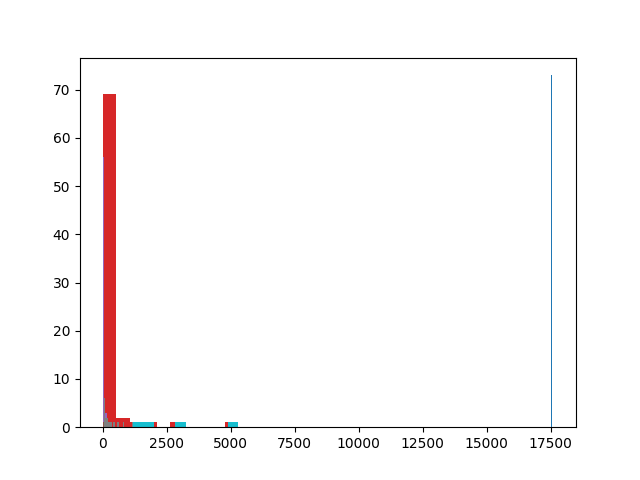

In [33]:
size_batches = sorted(size_batches)
plt.hist(size_batches[-4:])
plt.show()

In [46]:
np.quantile(size_batches,0.9)
for size in size_batches:
    if size > 40:
        print(size)

41
46
50
57
64
74
84
99
115
135
159
192
231
283
360
458
607
822
1180
1786
2988
5304


In [87]:
def seprate_batches(self,num_batches):
    batches = dict()
    size_batches = dict()
    batches_to_fill = set(list(range(num_batches)))
    batches_empty = set(list(range(num_batches)))

    for i in range((num_batches)):
        batches[i] = []
        size_batches[i] = 0

    mean_size = sum([len(cycle) for cycle in self.open_paths])/num_batches
    print(mean_size)
    print(batches_to_fill)

    self.open_paths = (sorted(self.open_paths,key = lambda x: len(x)))[::-1]
    
    for open_path in tqdm(self.open_paths):
        size = len(open_path)
        if size > mean_size:
            batch = batches_empty.pop()
            batches[batch].append(open_path)
            size_batches[batch] += size
            batches_to_fill.remove(batch)
        else:
            batches_possible = [batch for batch in batches_to_fill if size_batches[batch] + size < mean_size]
            assert len(batches_possible) > 0, "Error in the batches"
            batch = batches_possible[0]
            
            if batch in batches_empty:
                batches_empty.remove(batch)
            batches[batch].append(open_path)
            size_batches[batch] += size
            if size_batches[batch] > mean_size:
                batches_to_fill.remove(batch)
        
        
    return batches,size_batches

In [84]:
batches,size_batches = seprate_batches(C,1000)

1314.533
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

100%|██████████| 15684/15684 [00:01<00:00, 13399.46it/s]


(array([857.,  72.,  40.,  14.,   8.,   4.,   1.,   0.,   1.,   3.]),
 array([    0. ,  1760.7,  3521.4,  5282.1,  7042.8,  8803.5, 10564.2,
        12324.9, 14085.6, 15846.3, 17607. ]),
 <BarContainer object of 10 artists>)

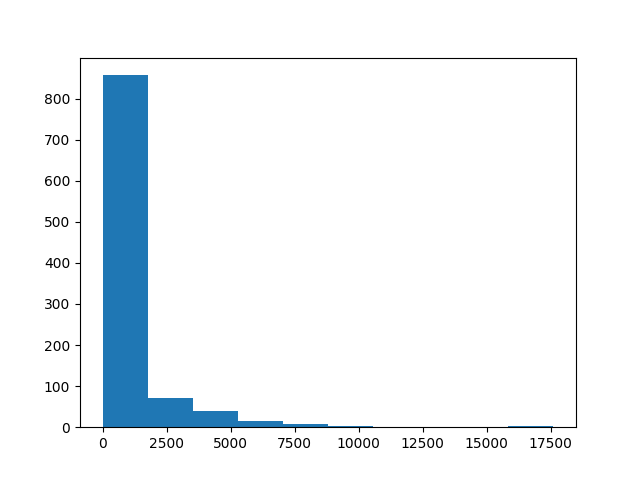

In [85]:
sizes = size_batches.values()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(sizes)

In [15]:
mp.pool.Pool.max

AttributeError: 'function' object has no attribute 'close'

In [6]:
print("now separating the open paths")
new_cycles = []
for cycle in tqdm(C.open_paths):
    new_cycles += C.untangle_2(cycle)

C.open_paths = []

for open_path in tqdm(new_cycles):
    ind = 0
    if open_path[ind+1] not in C.graph_res_networkx.neighbors(open_path[ind]):
        C.open_paths.append(open_path[::-1])
    else:
        C.open_paths.append(open_path)

now separating the open paths


  0%|          | 0/15684 [00:00<?, ?it/s]

 13%|█▎        | 2106/15684 [01:25<06:00, 37.70it/s] Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fd6952bf430>>
Traceback (most recent call last):
  File "/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/env_gurobi_HZ/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
 16%|█▌        | 2480/15684 [01:41<02:21, 93.35it/s]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fd6952bf430>>
Traceback (most recent call last):
  File "/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/env_gurobi_HZ/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
 20%|█▉        | 3103/15684 [02:35<17:24, 12.04it/s]  

In [6]:
for open_loop in C.cycles:
    ind = 0
    if open_loop[ind+1] not in (C.graph_res_networkx.neighbors(open_loop[ind])):
        print(open_loop[ind],open_loop[ind+1],open_loop)
        break


In [12]:
cycle = C.cycles[14]
len(cycle)

90

In [43]:
def closing_open_loops(open_loop):
    

NameError: name 'tqdm' is not defined

100%|██████████| 27/27 [00:00<00:00, 104954.78it/s]


(0.5, 3.5)

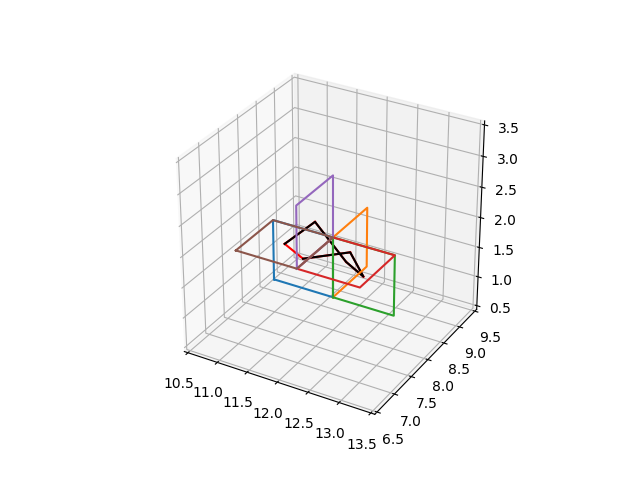

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
X,Y,Z = [],[],[]
cycle = [2497, 322, 2531, 4765, 319, 4728]

subgraph = C.graph_res_networkx.subgraph(cycle).copy()

for edge in subgraph.edges:
    A,B = edge
    A = transform_res_to_point(C.mapping[A])
    B = transform_res_to_point(C.mapping[B])
    X.append(A[0])
    X.append(B[0])
    Y.append(A[1])
    Y.append(B[1])
    Z.append(A[2])
    Z.append(B[2])
    ax.plot([A[0],B[0]],[A[1],B[1]],[A[2],B[2]],color="red")

for D in [cycle]:
    X1,Y1,Z1 = [],[],[]
    for point in D:
        point = transform_res_to_point(C.mapping[point])
        X1.append(point[0])
        Y1.append(point[1])
        Z1.append(point[2])
    ax.plot(X1,Y1,Z1,color="black")
    X = X+X1
    Y = Y+Y1
    Z = Z+Z1

# for edge in [a,b]:
#     p1,p2 = edge
#     p1 = transform_res_to_point(C.mapping[p1])
#     p2 = transform_res_to_point(C.mapping[p2])
#     ax.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]],color="blue")

ref_ = Refine_cycle([C.mapping[point] for point in cycle]+ [C.mapping[cycle[0]]])

# for point in Badpoints:
#     point = transform_res_to_point(C.mapping[point])
#     ax.plot(point[0],point[1],point[2],color="red",marker="x")

for square in ref_.squares:
    A,B,M = [],[],[]
    mean_point = np.mean(np.array(square)[:4],axis=0)
    mean_point = tuple(mean_point)
    if True:
        for point in square+[square[0]]:
            A.append(point[0])
            B.append(point[1])
            M.append(point[2])
        ax.plot(A,B,M)

# X = X+A
# Y = Y+B
# Z = Z+M

# for point in degree_2:
#     point = transform_res_to_point(C.mapping[point])
#     ax.plot(point[0],point[1],point[2],color="red",marker="x")

X,Y,Z = np.array(X),np.array(Y),np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 + 1

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)



In [34]:
len(C.cycles)

7

In [2]:
C.graph_res_networkx.neighbors(a[0])

NameError: name 'C' is not defined